In [295]:
import os, sys
sys.path.append('..')

import numpy as np
from src.solver import solver1D
from scipy.stats import norm

from src.model.carrier_density import *
import matplotlib.pyplot as plt
from scipy.constants import e, k, epsilon_0

# Si PN Junction (homojunction)

In [296]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value


In [297]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


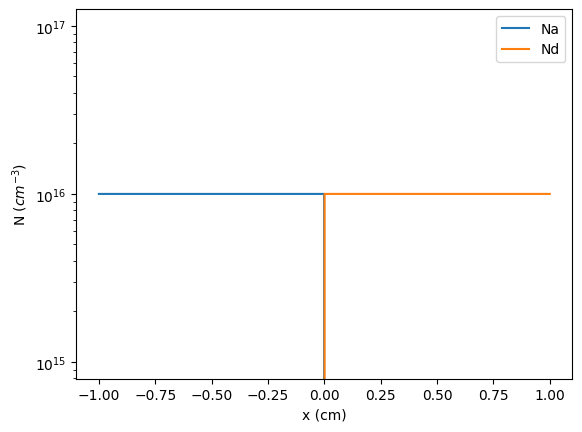

In [298]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [299]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V, V_history = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, record=True)

 41%|████      | 818/2000 [00:01<00:02, 462.07it/s]


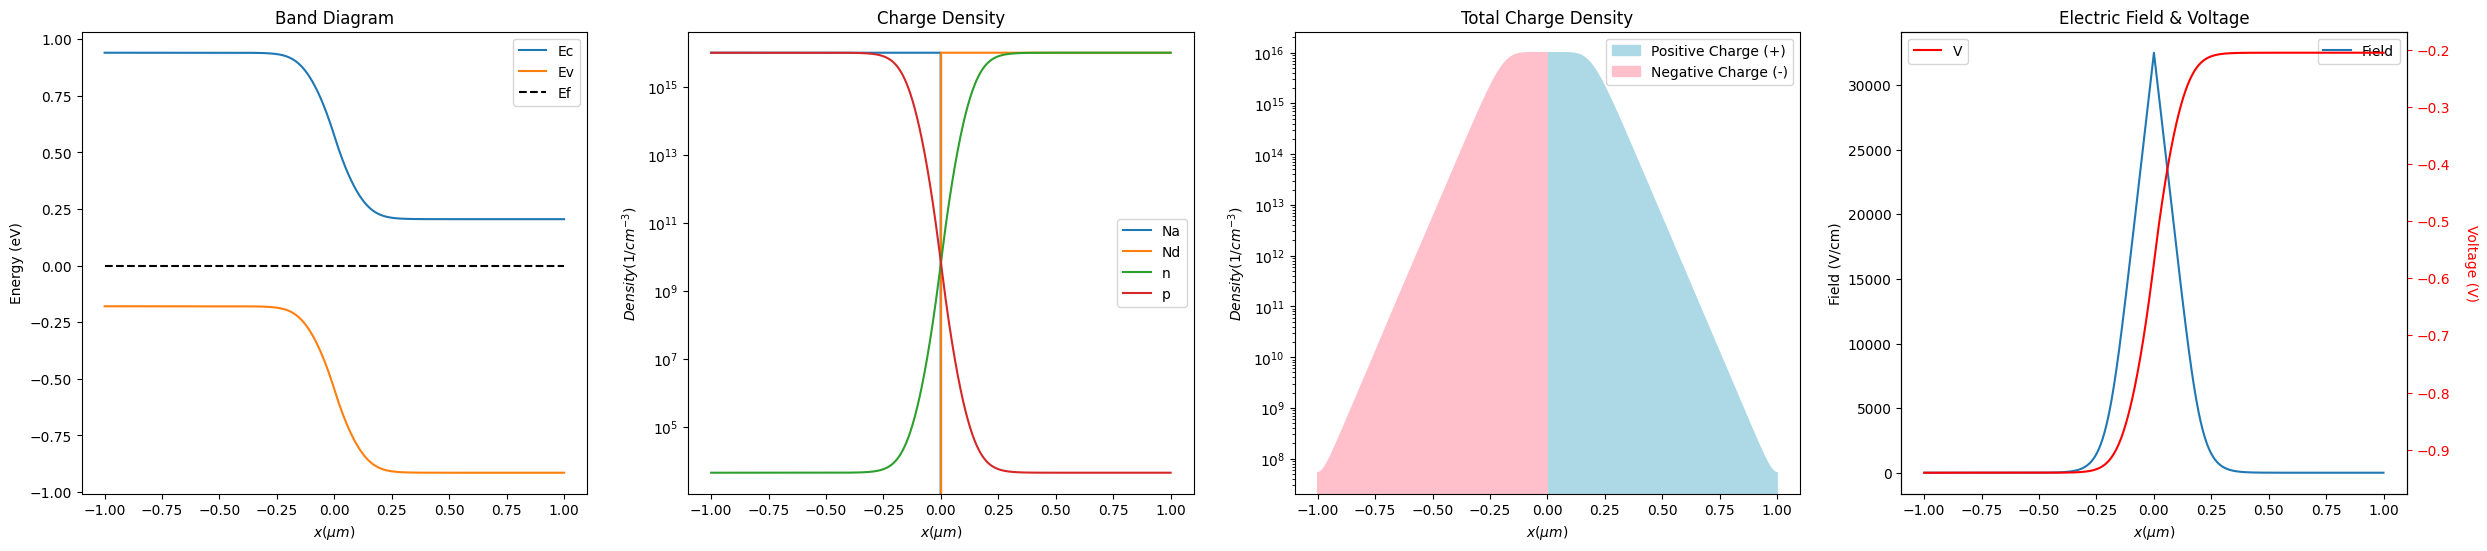

In [300]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

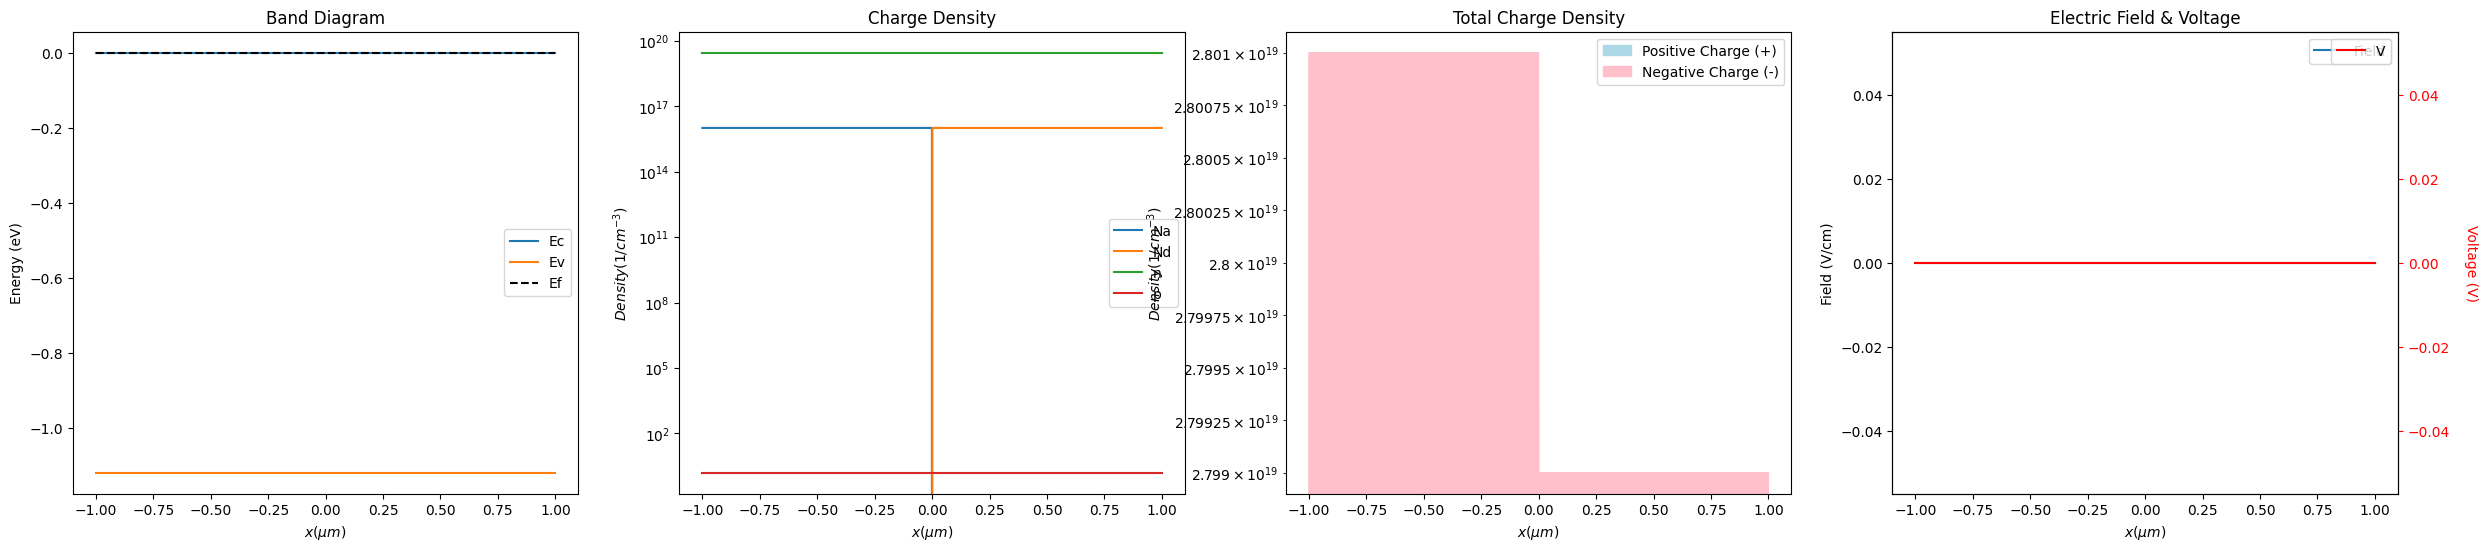

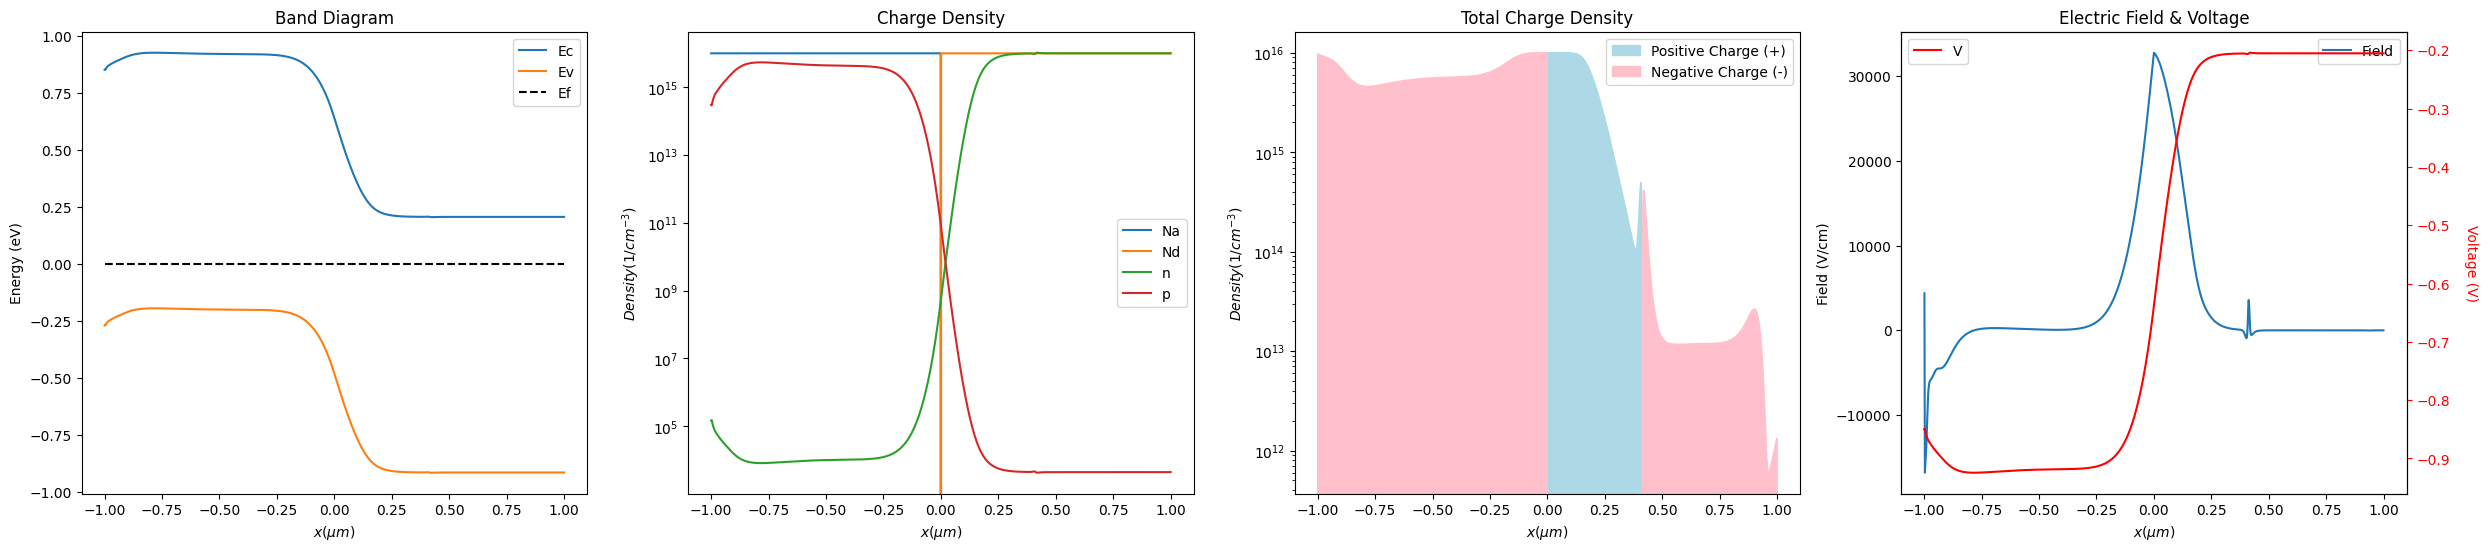

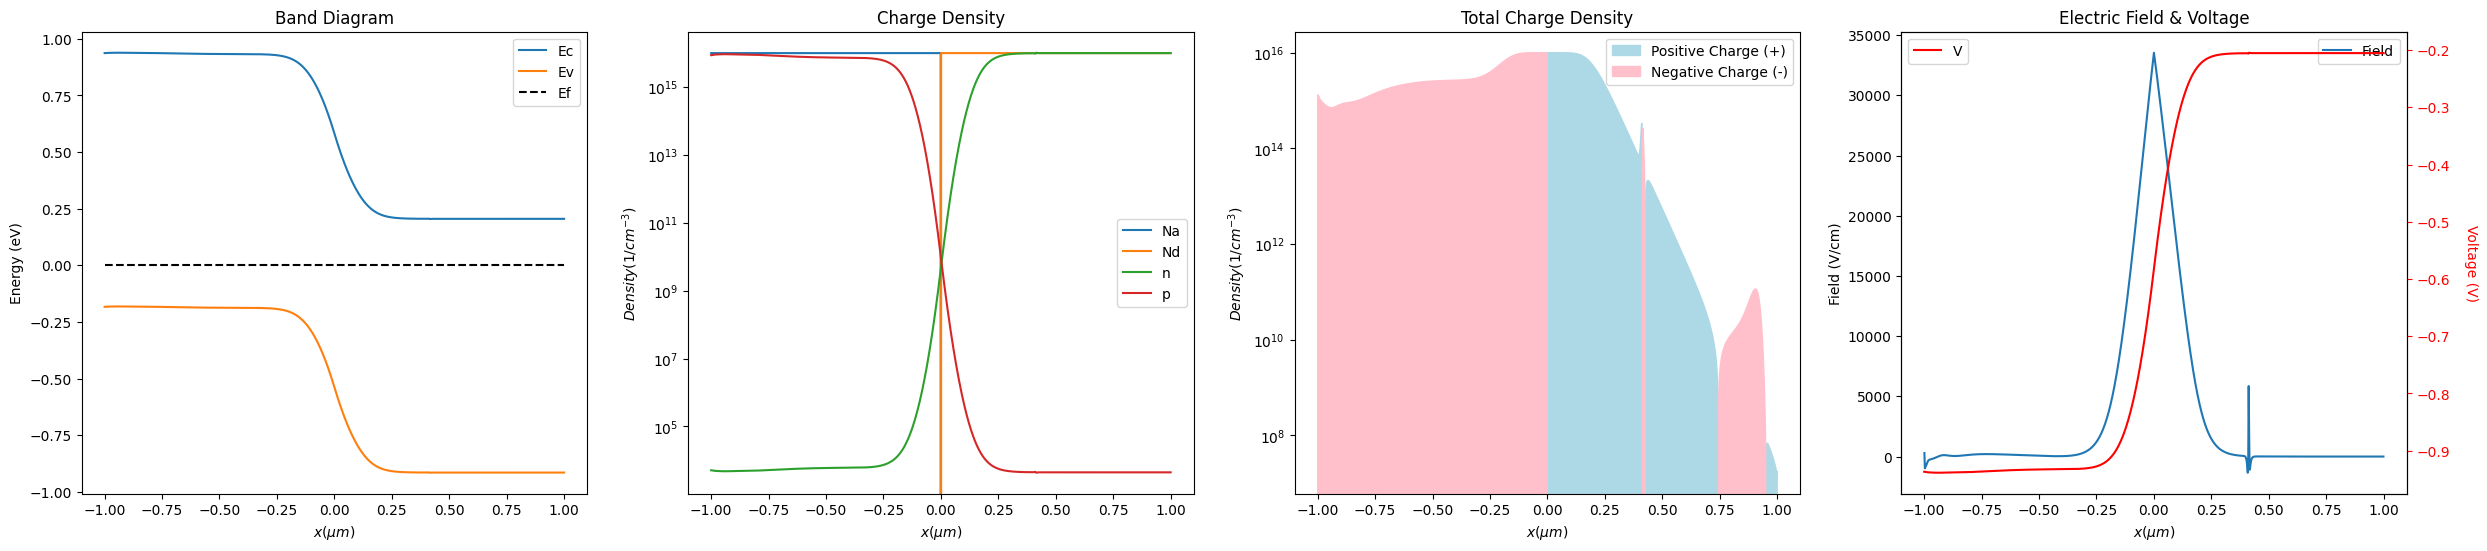

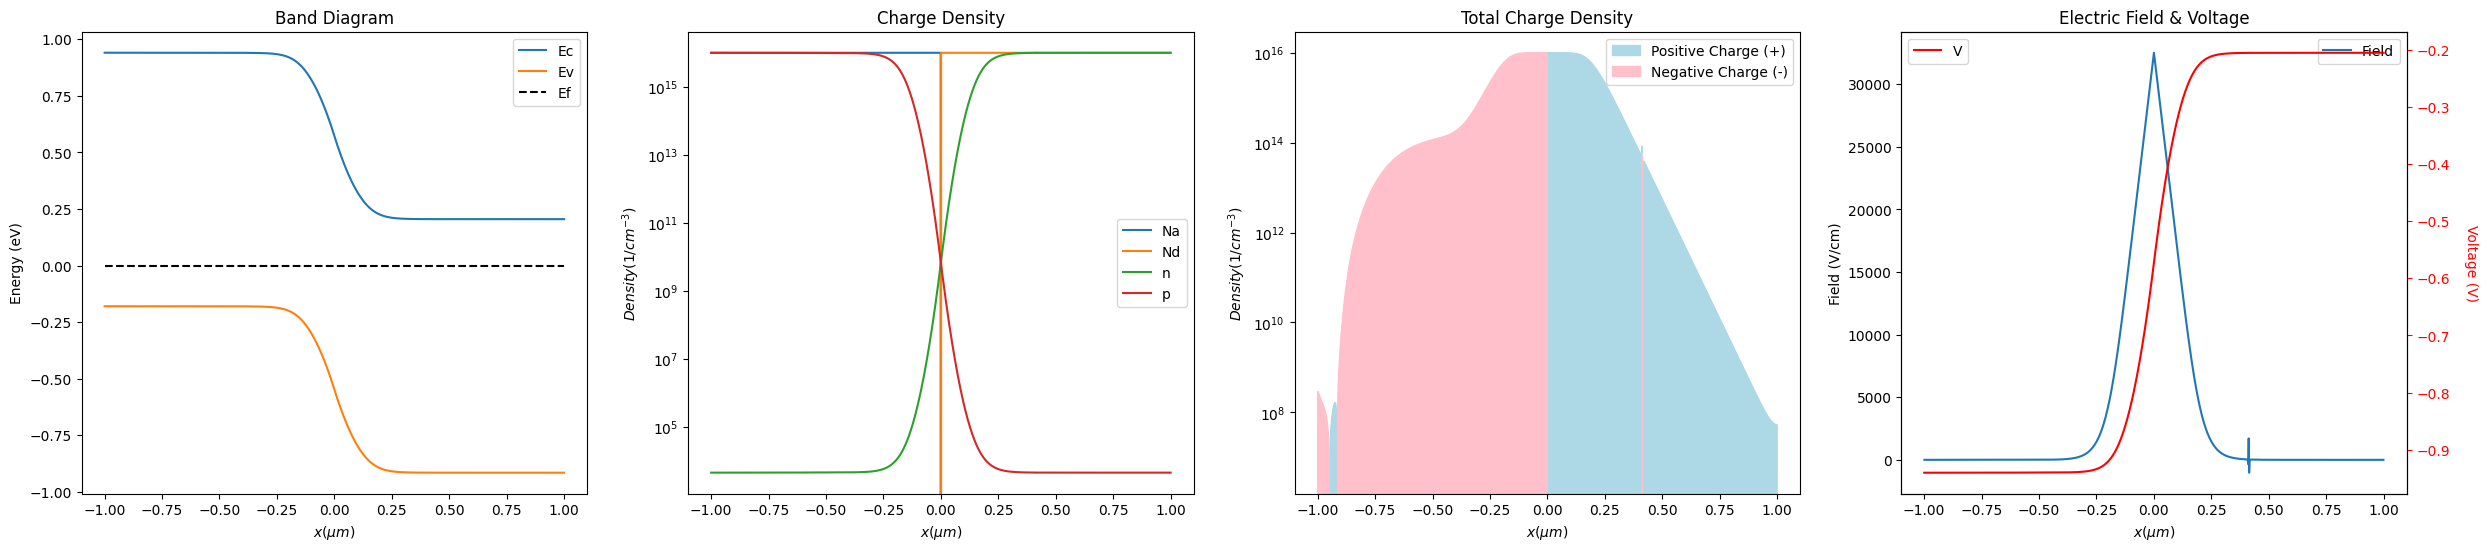

In [301]:
""" plot history """
step = 0
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 50
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 100
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

step = 300
solver1D.plot_Poisson_1D(x=x, V=V_history[step], n=cal_n(x, V_history[step]), p=cal_p(x, V_history[step]), total_charge_density = cal_total_charge_density(x, V_history[step]), Ec=cal_Ec_from_V(x, V_history[step]), Ev=cal_Ev_from_V(x, V_history[step]), Field=solver1D.do_gradient(V_history[step], dx = x[1] - x[0]), Na=Na, Nd=Nd);

# Si PN+ Junction (homojunction)

In [302]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd_value = 1e18 # cm^-3

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value


In [303]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


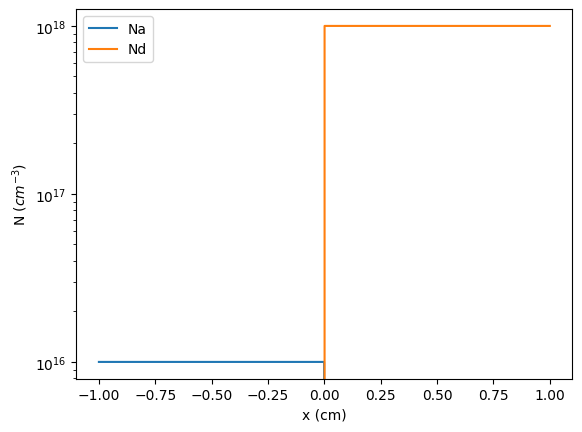

In [304]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [305]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 59%|█████▉    | 594/1000 [00:01<00:00, 415.53it/s]


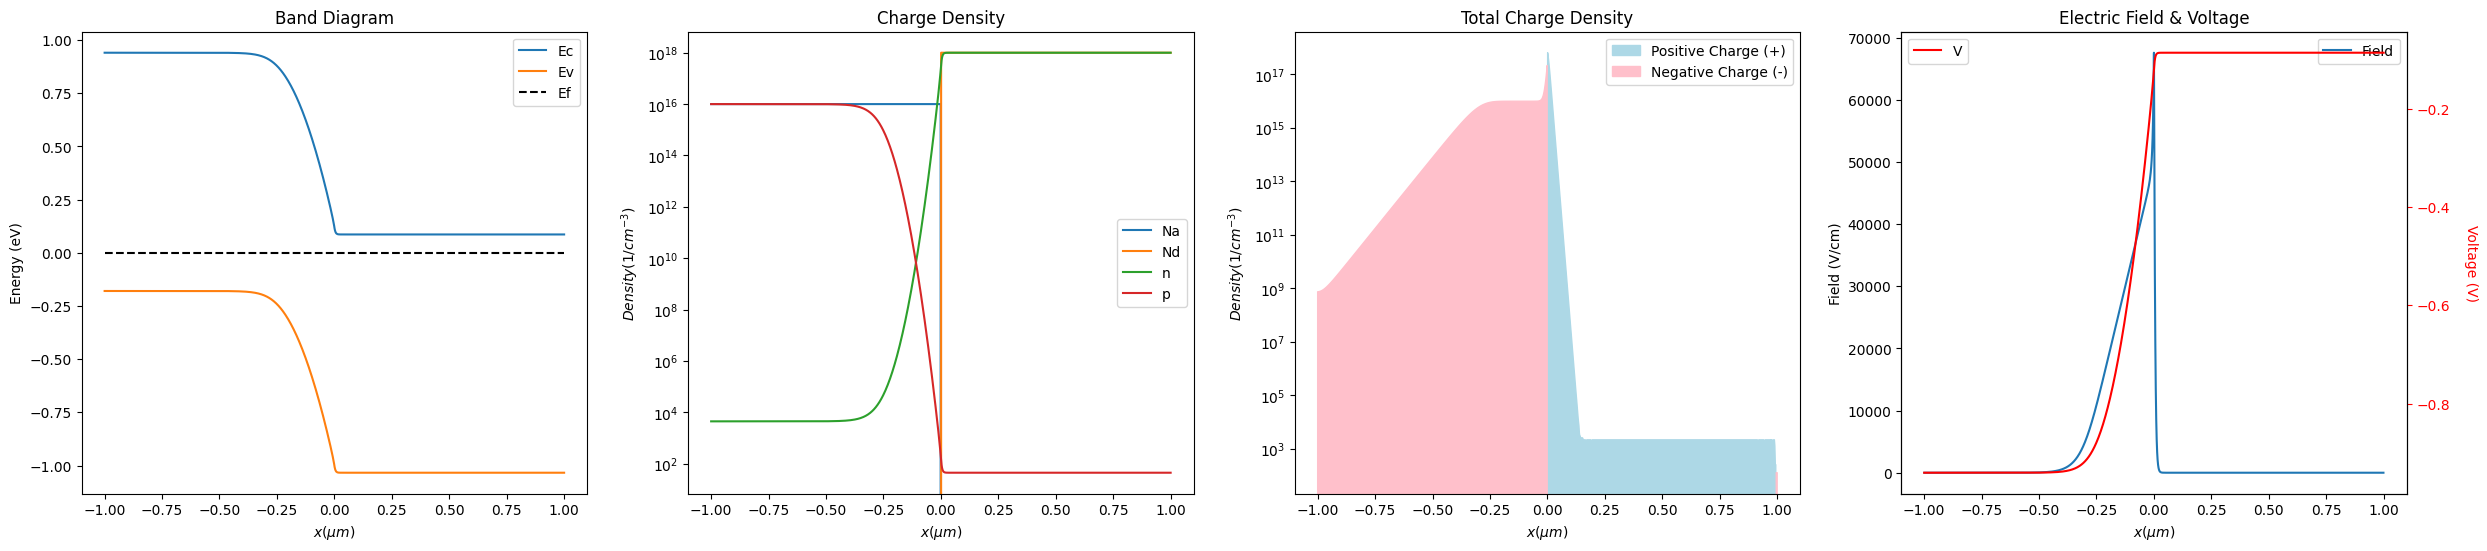

In [306]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si - GaAs Junction (Heterojunction)

In [307]:
""" constants setting """
T = 300
kT_q = k*T/e
epsilon_Si     = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q   = epsilon_r['Si'] * epsilon_0 * 1e-2 / e
epsilon_GaAs   = epsilon_r['GaAs'] * epsilon_0 * 1e-2
epsilon_GaAs_q = epsilon_r['GaAs'] * epsilon_0 * 1e-2 / e


Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value

In [308]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = cal_Ec_from_V(x, V) 
    Ev[x >=0] -= Eg['Si']
    Ev[x < 0] -= Eg['GaAs']
    return Ev
def cal_n(x, V):
    n = np.zeros_like(x)
    mask = x >= 0
    n[mask]  = cal_electron_density(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    n[~mask] = cal_electron_density(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return n
def cal_p(x, V):
    p = np.zeros_like(x)
    mask = x >= 0
    p[mask]  = cal_hole_density(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    p[~mask] = cal_hole_density(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return p
def cal_dn_dV(x, V):
    dn_dV = np.zeros_like(x)
    mask = x >= 0
    dn_dV[mask]  = -cal_dn_dEc(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    dn_dV[~mask] = -cal_dn_dEc(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return dn_dV
def cal_dp_dV(x, V):
    dp_dV = np.zeros_like(x)
    mask = x >= 0
    dp_dV[mask]  = -cal_dp_dEv(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    dp_dV[~mask] = -cal_dp_dEv(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return dp_dV

def cal_total_charge_density(x, V):
    N  = Nd  - Na  + cal_p(x,  V)  - cal_n(x,  V)
    return N
def cal_dtotal_charge_density_dV(x, V):
    dN_dV  = cal_dp_dV(x,  V)  - cal_dn_dV(x,  V)
    return dN_dV

def src_fun(x, V):
    src = np.zeros_like(x)
    mask = x >= 0
    src[mask]  = - (1/epsilon_Si_q)   * (Nd[mask]  - Na[mask]  + cal_p(x[mask],  V[mask])  - cal_n(x[mask],  V[mask]))
    src[~mask] = - (1/epsilon_GaAs_q) * (Nd[~mask] - Na[~mask] + cal_p(x[~mask], V[~mask]) - cal_n(x[~mask], V[~mask]))
    return src
def d_src_dV_fun(x, V):
    d_src_dV = np.zeros_like(x)
    mask = x >= 0
    d_src_dV[mask]  = - (1/epsilon_Si_q)   * (cal_dp_dV(x[mask],  V[mask])  - cal_dn_dV(x[mask],  V[mask]))
    d_src_dV[~mask] = - (1/epsilon_GaAs_q) * (cal_dp_dV(x[~mask], V[~mask]) - cal_dn_dV(x[~mask], V[~mask]))
    return d_src_dV

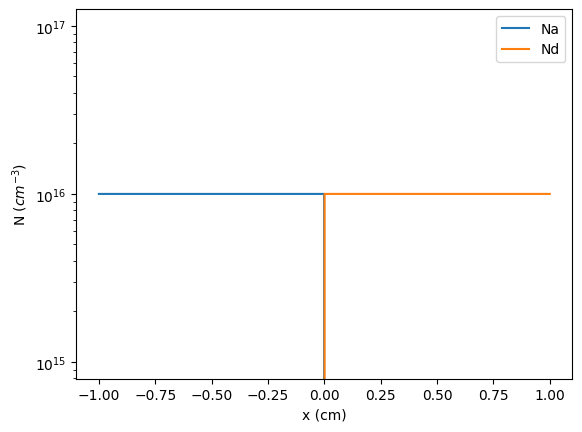

In [309]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [310]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=2000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 63%|██████▎   | 1269/2000 [00:03<00:02, 341.08it/s]


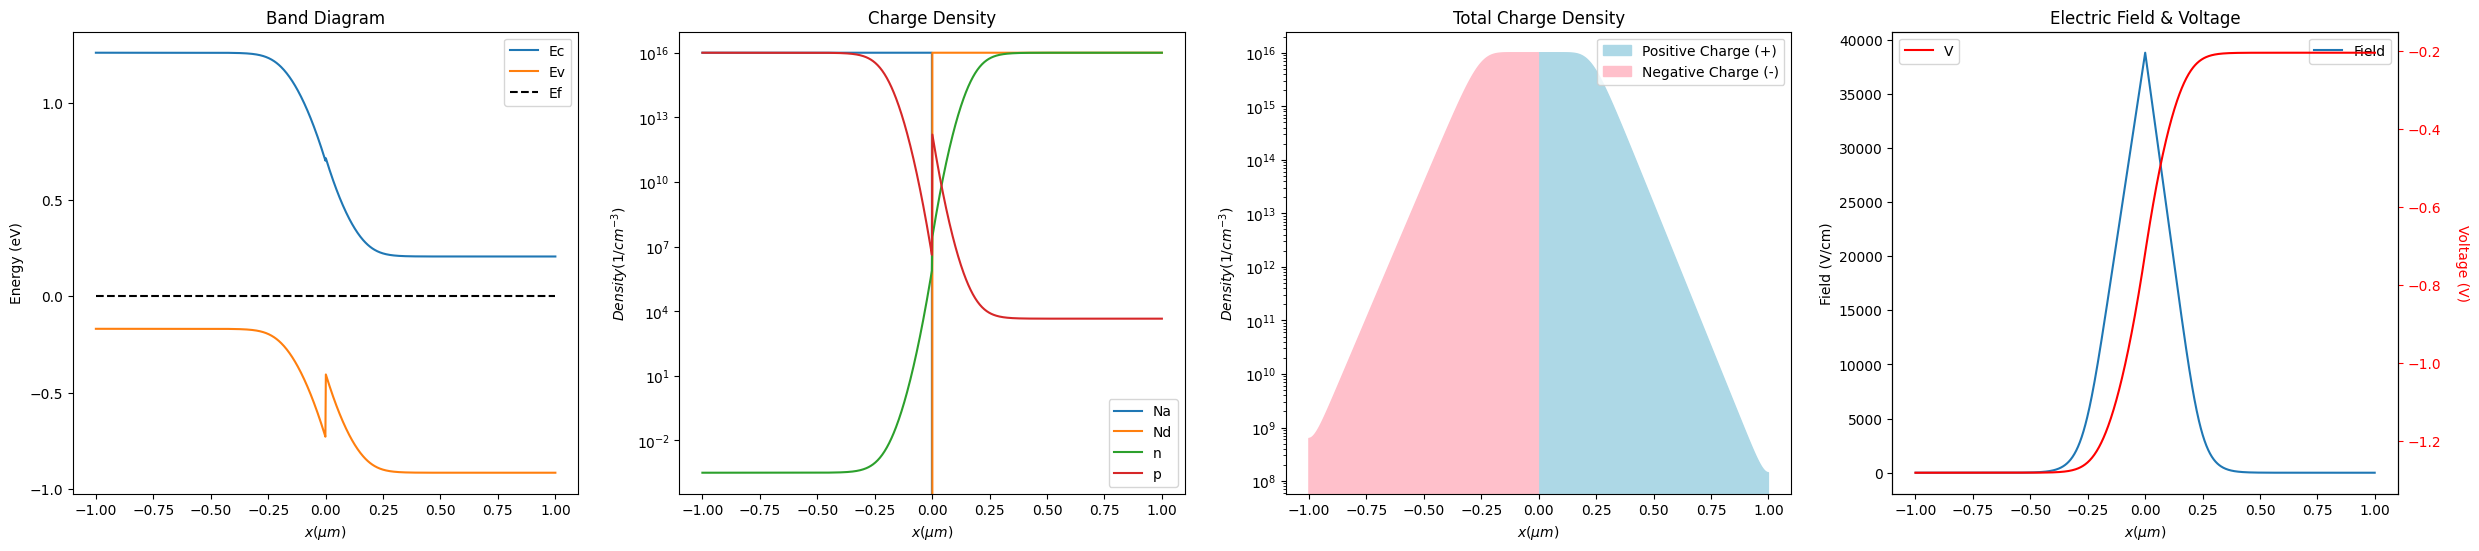

In [311]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PIN Junction (homojunction)

In [312]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<-0.1e-4] = Na_value
Nd[x>0.1e-4] = Nd_value


In [313]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)

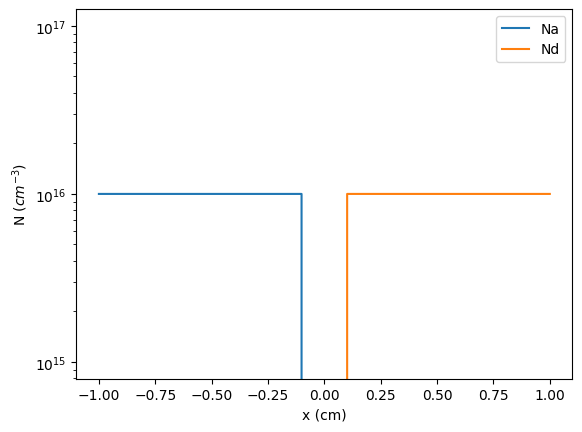

In [314]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [315]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 80%|████████  | 801/1000 [00:01<00:00, 441.01it/s]


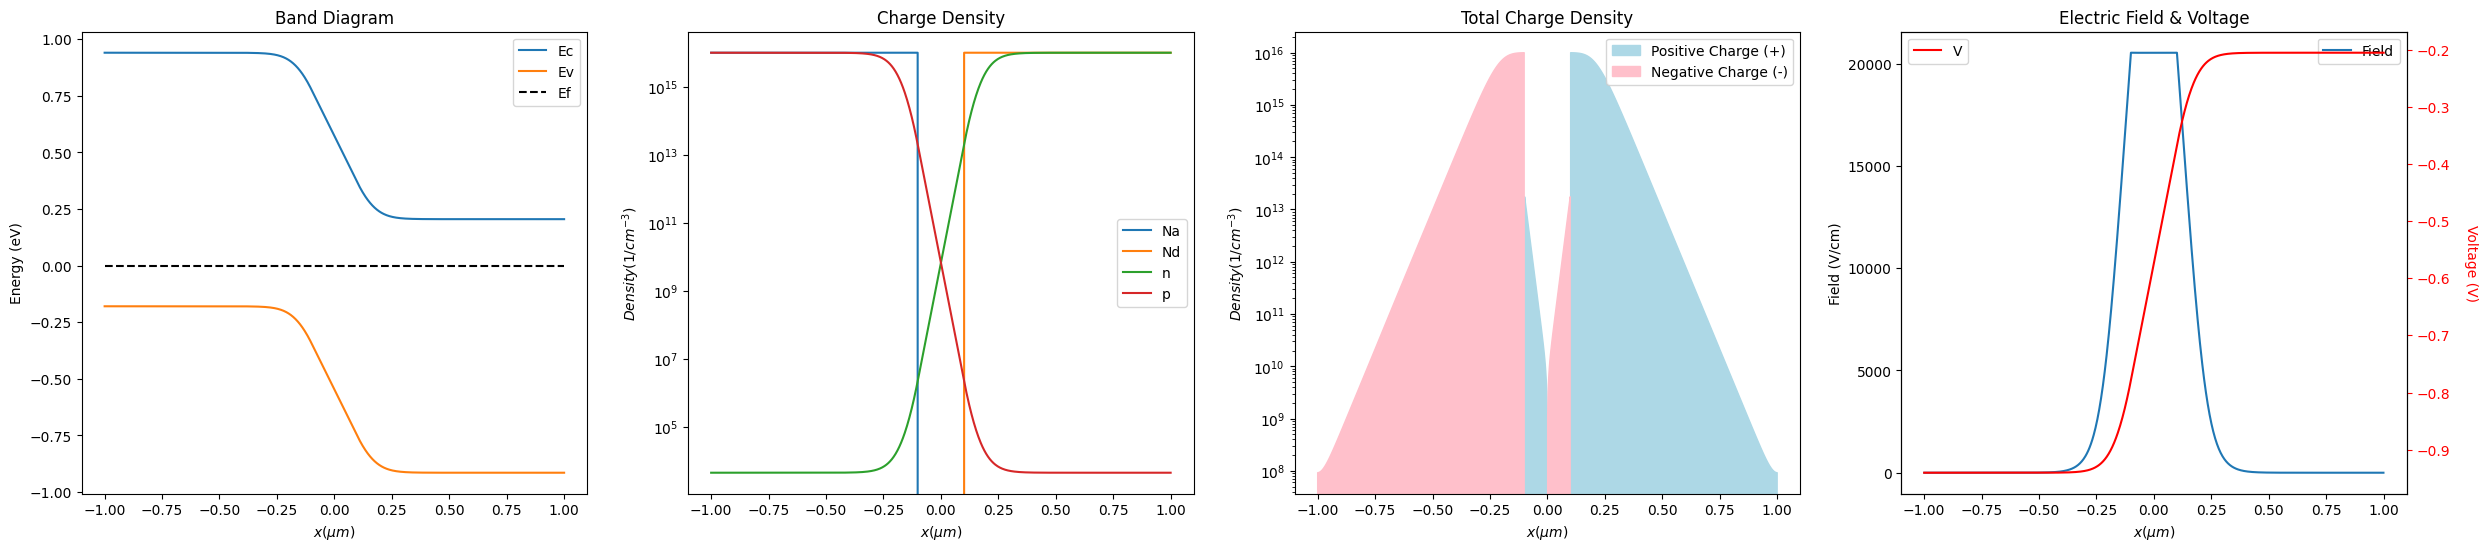

In [316]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNP Junction (homojunction)

In [317]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(-2e-4, 2e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
L = 1.0e-4
mask = np.bitwise_and( x>-L, x<L)
Nd[mask] = Nd_value
mask = np.bitwise_or( x<-L, x>L)
Na[mask] = Na_value


In [318]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


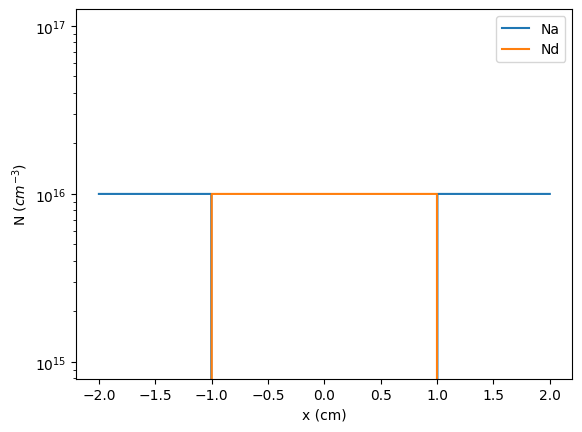

In [319]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [320]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 90%|████████▉ | 896/1000 [00:01<00:00, 459.84it/s]


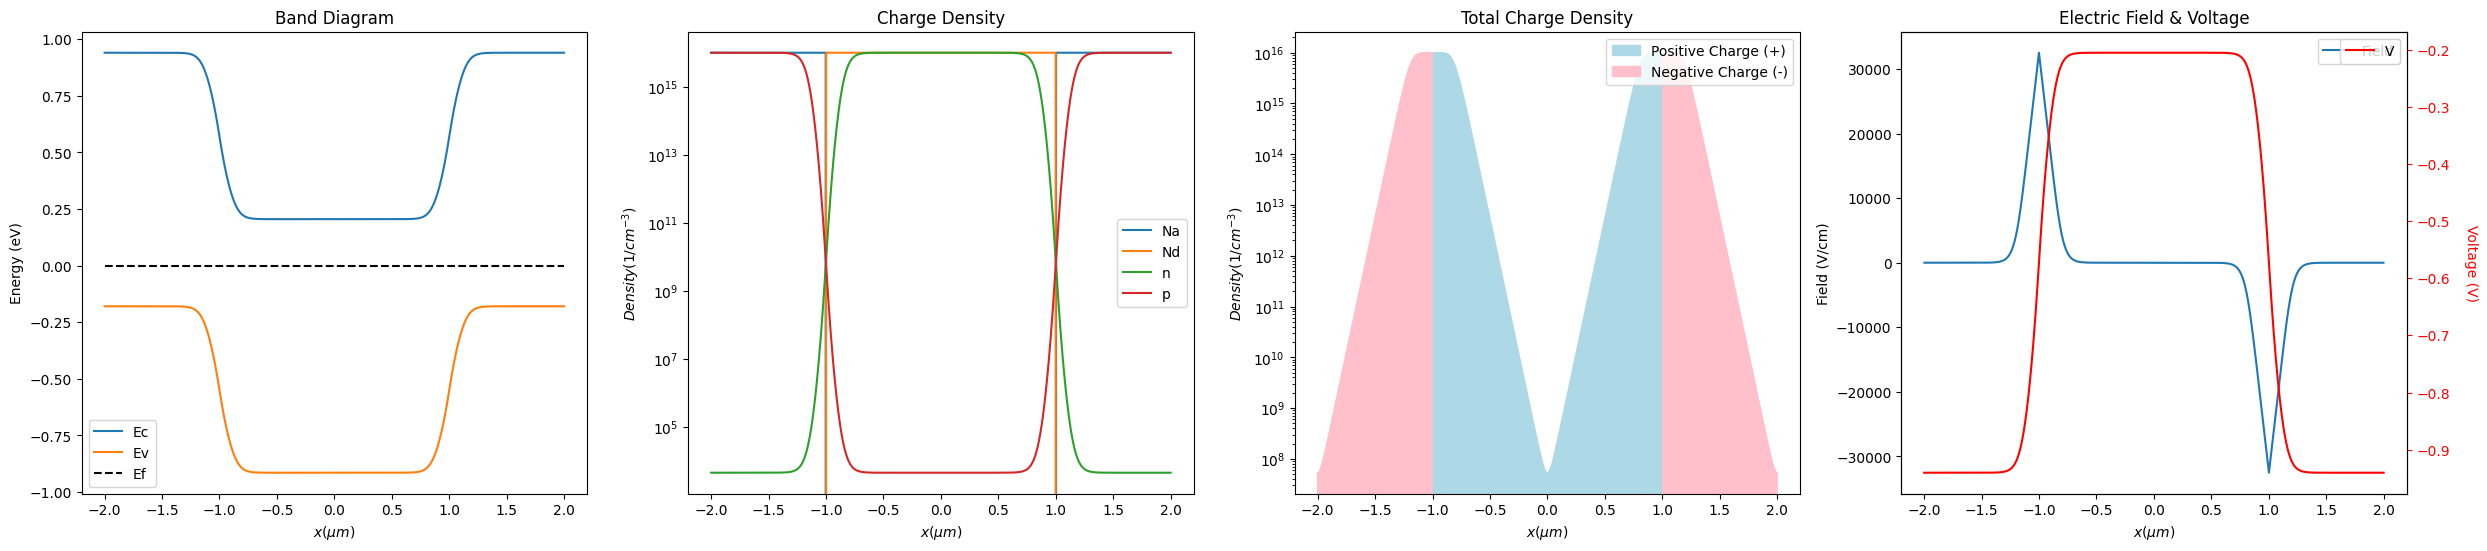

In [321]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNN+ junction

In [322]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd1_value = 1e18 # cm^-3
Nd2_value = 1e16 # cm^-3

x = np.linspace(-2e-4, 2e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
Nd[x > 0.3e-4] = Nd1_value
mask = np.bitwise_and( x>0, x<0.3e-4)
Nd[mask] = np.exp( np.log(Nd2_value) + ( np.log(Nd1_value) - np.log(Nd2_value)) * x[mask] / 0.3e-4 )
Na[x < 0] = Na_value


In [323]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


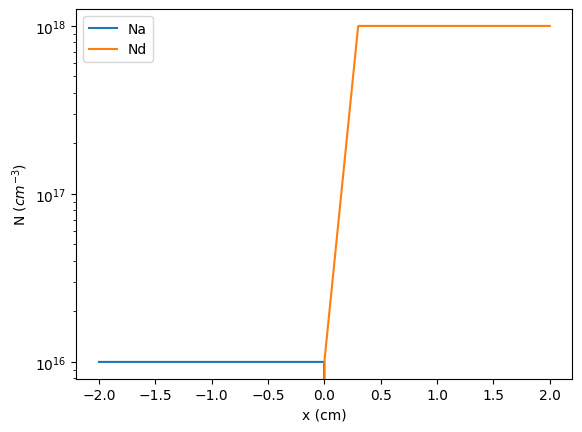

In [324]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [325]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=4000)

 65%|██████▌   | 2614/4000 [00:06<00:03, 420.04it/s]


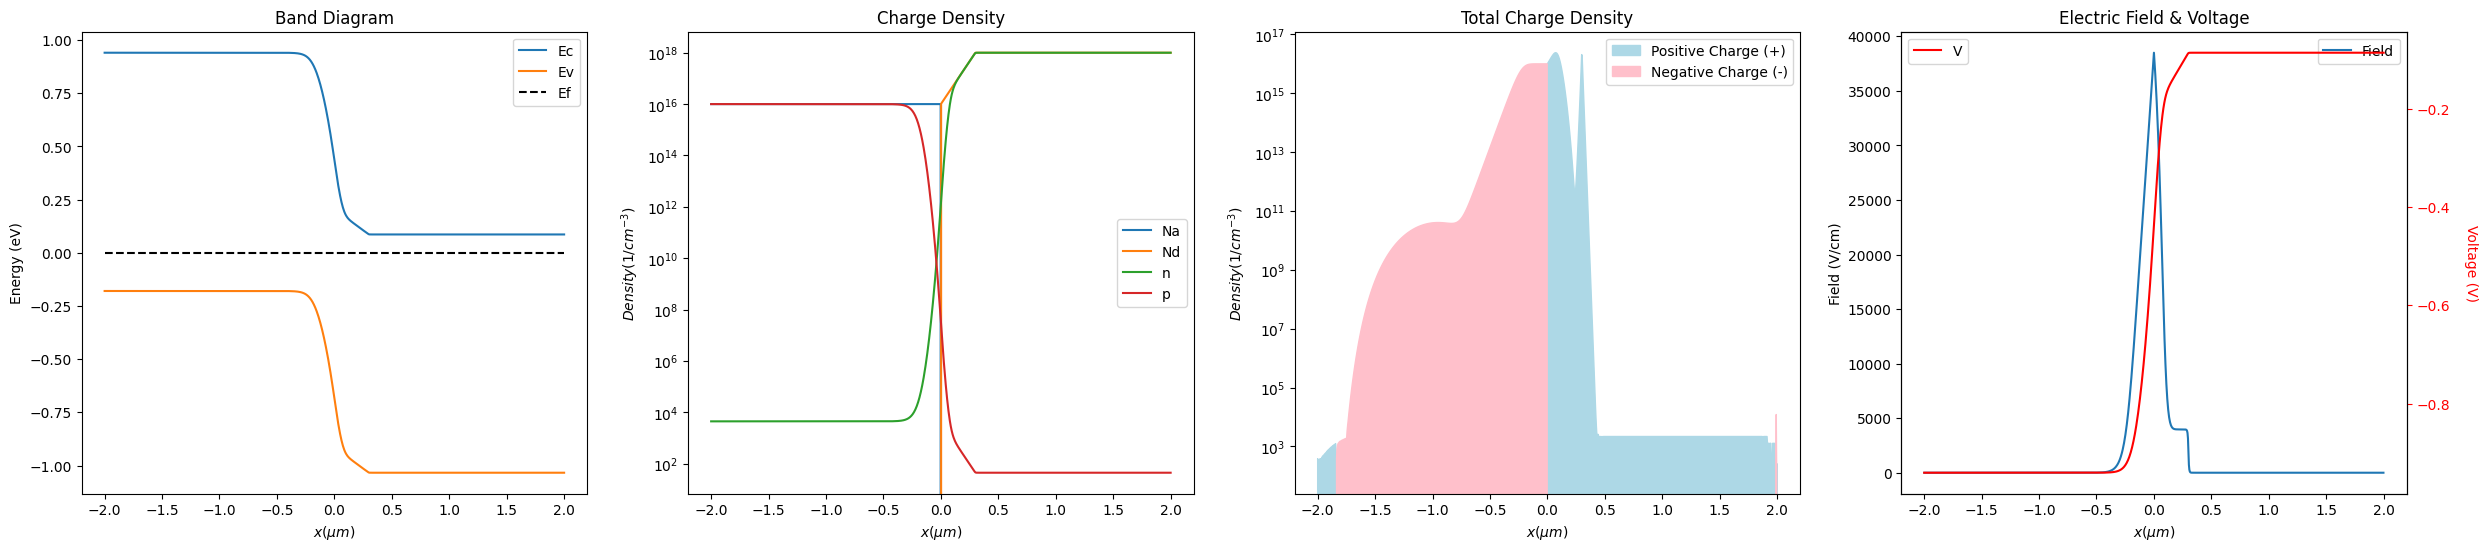

In [326]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si PNP Junction / Coupled

In [327]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(-2e-4, 2e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
L = 0.1e-4
mask = np.bitwise_and( x>-L, x<L)
Nd[mask] = Nd_value
mask = np.bitwise_or( x<-L, x>L)
Na[mask] = Na_value


In [328]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


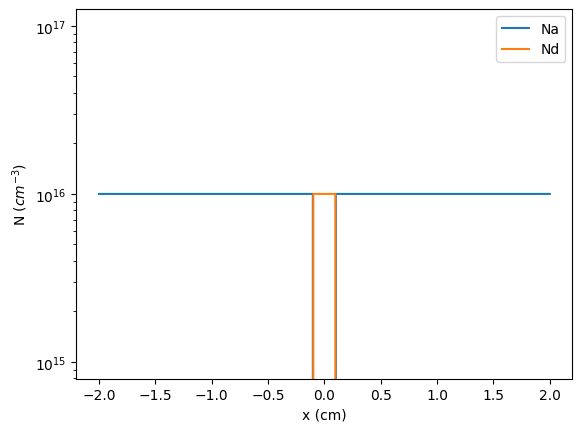

In [329]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [330]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=10000)

 67%|██████▋   | 6660/10000 [00:16<00:08, 411.69it/s]


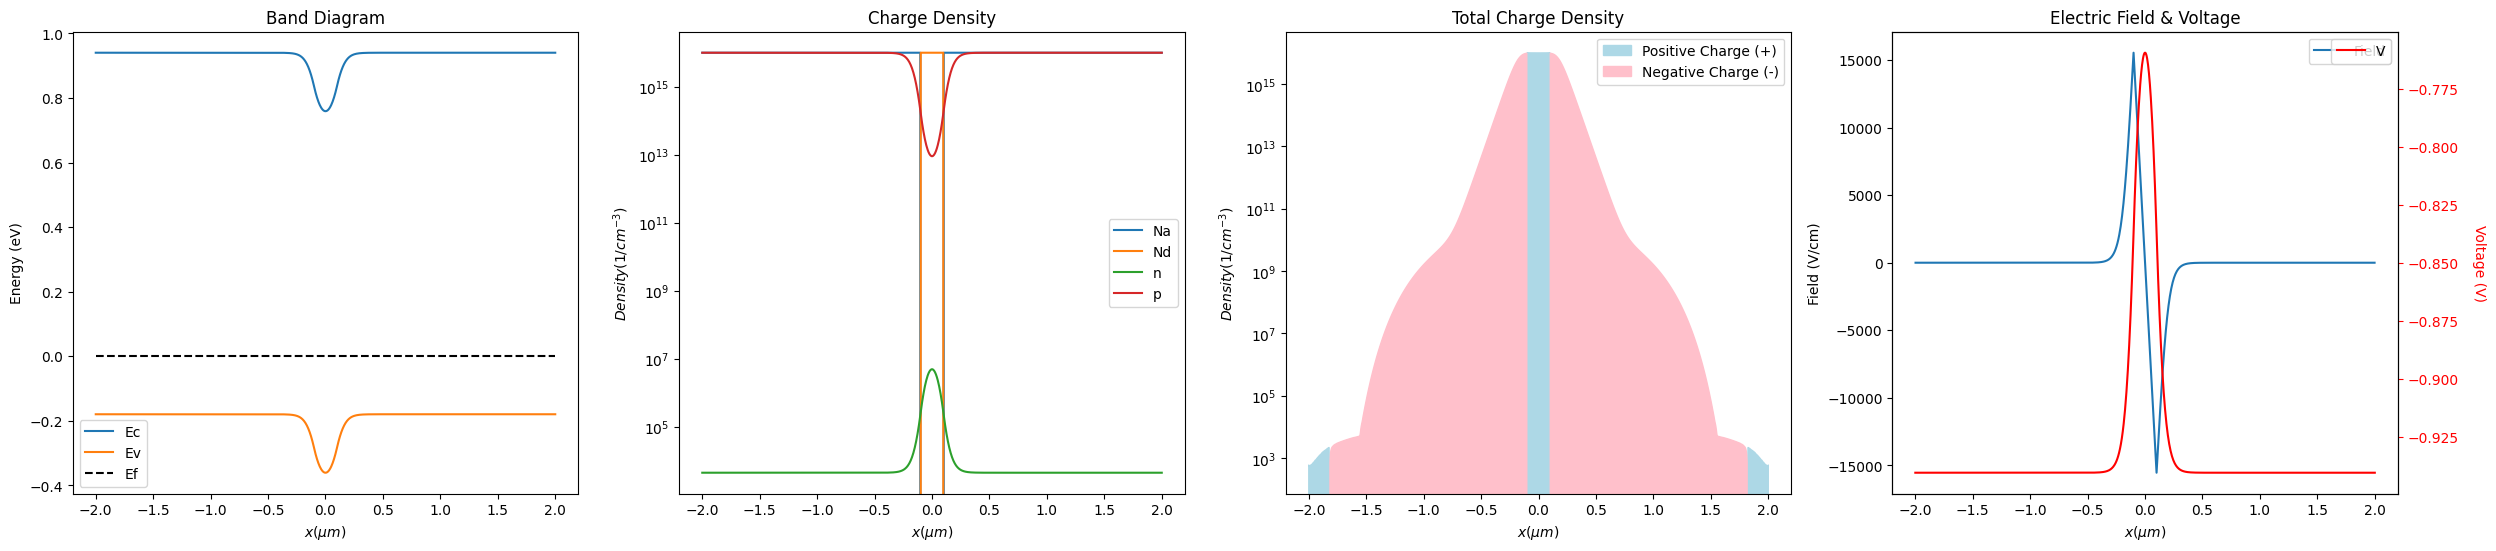

In [331]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC? 

In [332]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 0 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(0, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
Nd[x>=0] = Nd_value

In [333]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


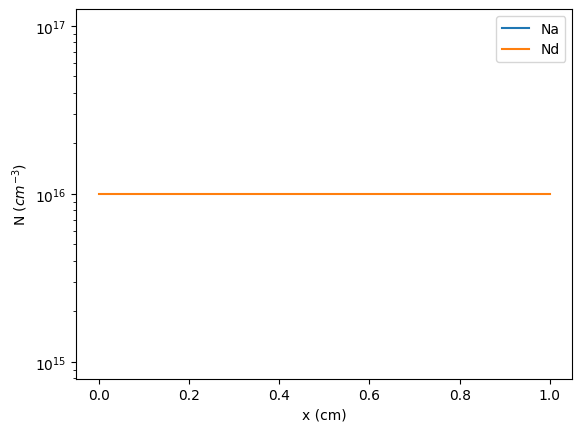

In [334]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [335]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, v0= 0, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000)

 19%|█▉        | 383/2000 [00:00<00:03, 414.27it/s]


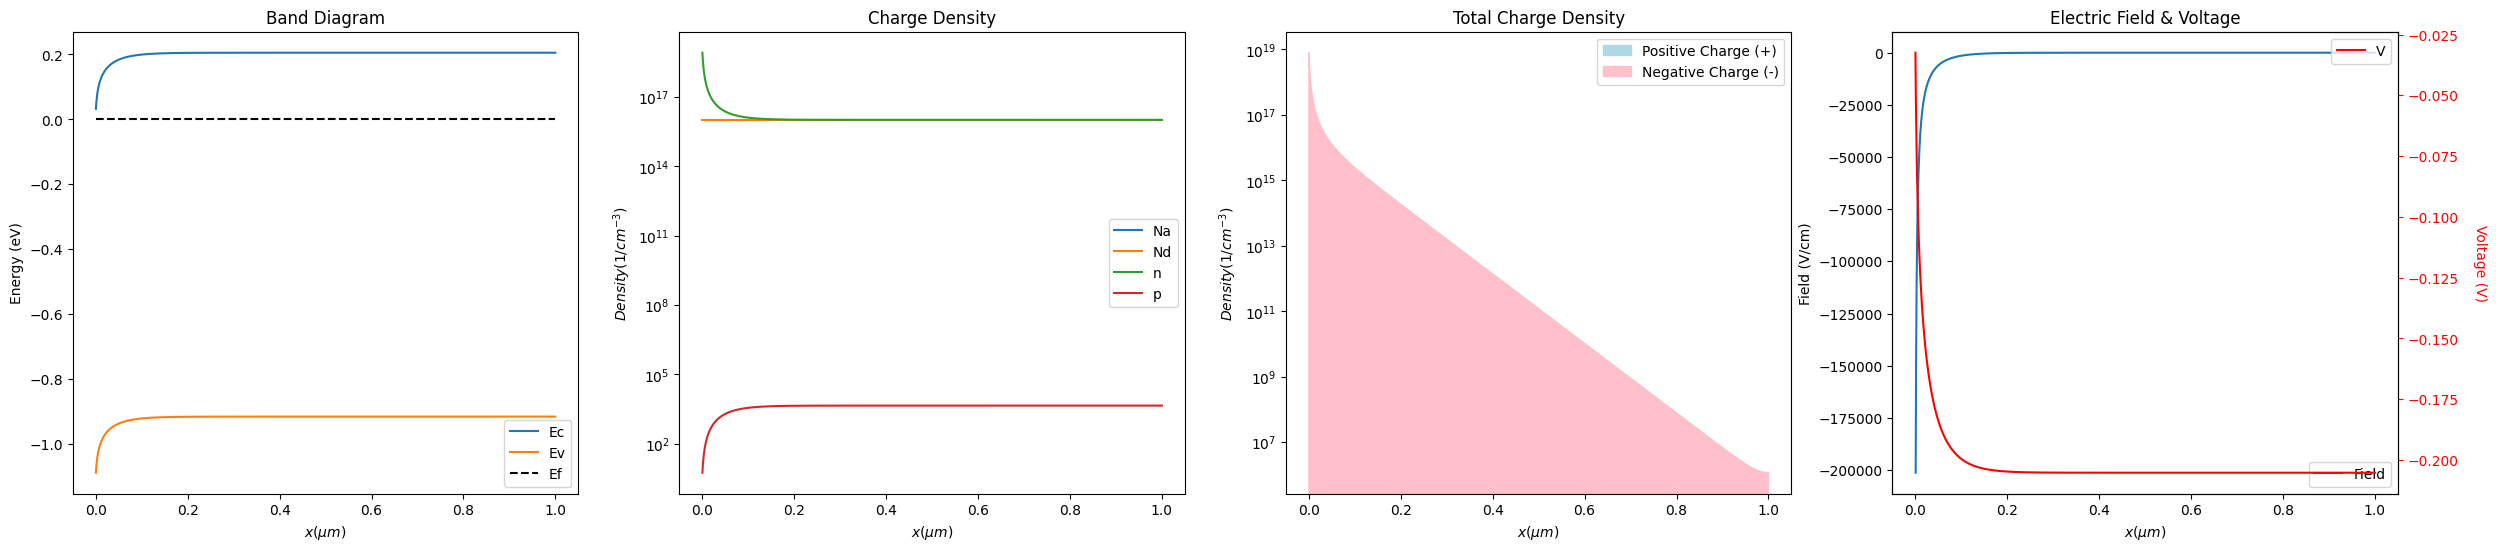

In [336]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N + BC? -> Metal - Semi junction

In [337]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 0 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(0, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
Nd[x>=0] = Nd_value

In [338]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


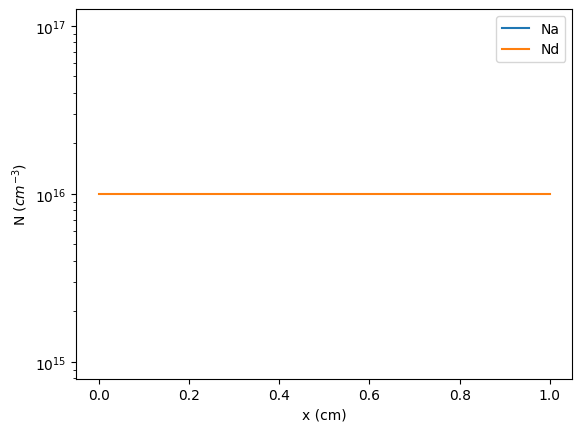

In [339]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [340]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000)

  6%|▌         | 114/2000 [00:00<00:05, 355.56it/s]


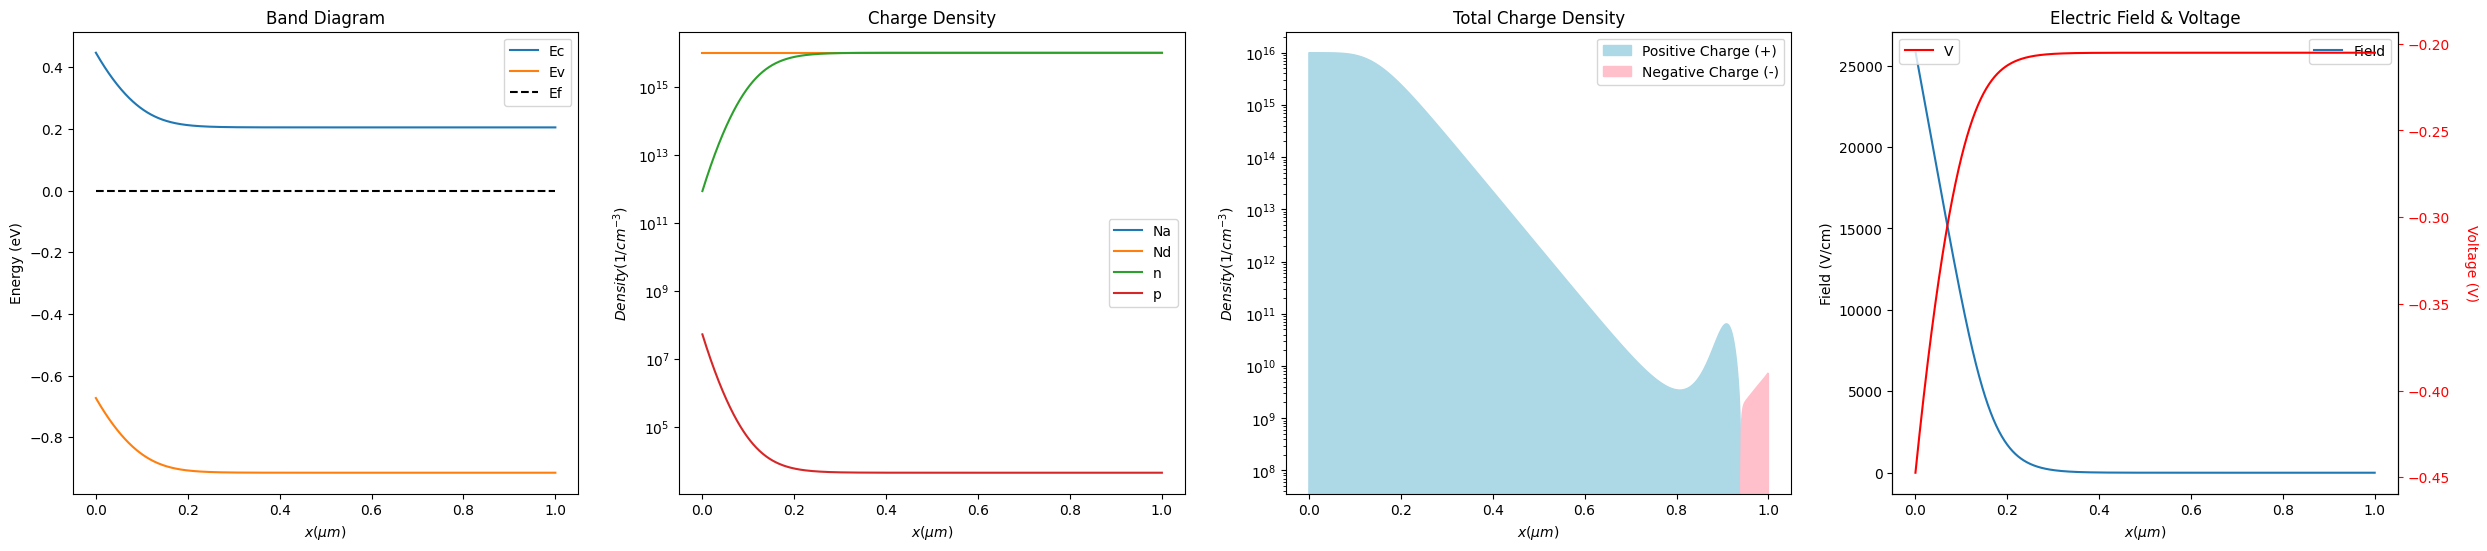

In [341]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si N+ N / Heavy Doping+ BC? -> Metal - Semi junction

In [342]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 0 # cm^-3
Nd1_value = 1e18 # cm^-3
Nd2_value = 1e16 # cm^-3

x = np.linspace(0, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
Nd[x>0] = Nd1_value
Nd[x>=0.02e-4] = Nd2_value

In [343]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    return cal_electron_density(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
def cal_p(x, V):
    return cal_hole_density(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
def cal_dn_dV(x, V):
    return -cal_dn_dEc(Ec = cal_Ec_from_V(x, V), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
def cal_dp_dV(x, V):
    return -cal_dp_dEv(Ev = cal_Ev_from_V(x, V), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


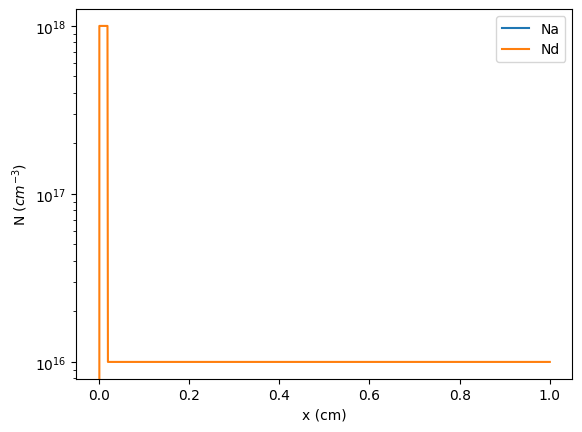

In [344]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [345]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000)

  6%|▌         | 115/2000 [00:00<00:04, 380.94it/s]


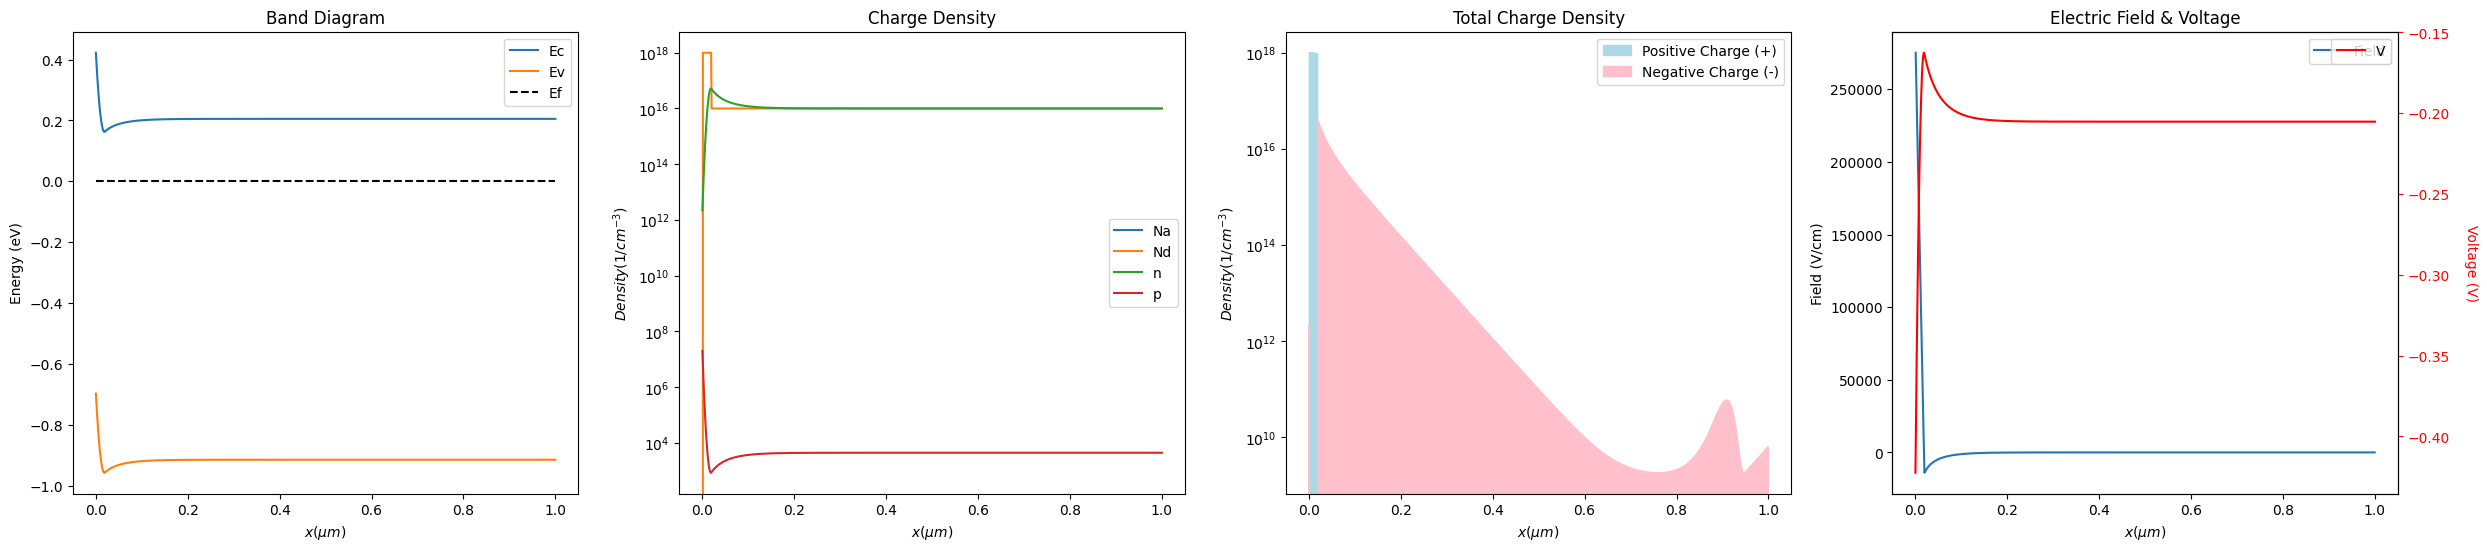

In [346]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);

# Si - GaAs Junction (Heterojunction) + Dit (Acceptor Like)

In [347]:
""" constants setting """
T = 300
kT_q = k*T/e
epsilon_Si     = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q   = epsilon_r['Si'] * epsilon_0 * 1e-2 / e
epsilon_GaAs   = epsilon_r['GaAs'] * epsilon_0 * 1e-2
epsilon_GaAs_q = epsilon_r['GaAs'] * epsilon_0 * 1e-2 / e


Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3
N_dit = 3e16 # cm^-2
E_dit_sigma = 0.02 # eV

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value

In [348]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = cal_Ec_from_V(x, V) 
    Ev[x >=0] -= Eg['Si']
    Ev[x < 0] -= Eg['GaAs']
    return Ev
def cal_n(x, V):
    n = np.zeros_like(x)
    mask = x >= 0
    n[mask]  = cal_electron_density(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    n[~mask] = cal_electron_density(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return n
def cal_p(x, V):
    p = np.zeros_like(x)
    mask = x >= 0
    p[mask]  = cal_hole_density(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    p[~mask] = cal_hole_density(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return p
def cal_dn_dV(x, V):
    dn_dV = np.zeros_like(x)
    mask = x >= 0
    dn_dV[mask]  = -cal_dn_dEc(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    dn_dV[~mask] = -cal_dn_dEc(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return dn_dV
def cal_dp_dV(x, V):
    dp_dV = np.zeros_like(x)
    mask = x >= 0
    dp_dV[mask]  = -cal_dp_dEv(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    dp_dV[~mask] = -cal_dp_dEv(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return dp_dV

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.8*Eg['Si']
    return E_dit_mean

def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - N_dit * np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = np.zeros_like(x)
    mask = x >= 0
    src[mask]  = - (1/epsilon_Si_q)   * (Nd[mask]  - Na[mask]  + cal_p(x[mask],  V[mask])  - cal_n(x[mask],  V[mask]))
    src[~mask] = - (1/epsilon_GaAs_q) * (Nd[~mask] - Na[~mask] + cal_p(x[~mask], V[~mask]) - cal_n(x[~mask], V[~mask]))

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_Si_q) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = np.zeros_like(x)
    mask = x >= 0
    d_src_dV[mask]  = - (1/epsilon_Si_q)   * (cal_dp_dV(x[mask],  V[mask])  - cal_dn_dV(x[mask],  V[mask]))
    d_src_dV[~mask] = - (1/epsilon_GaAs_q) * (cal_dp_dV(x[~mask], V[~mask]) - cal_dn_dV(x[~mask], V[~mask]))
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_Si_q) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV


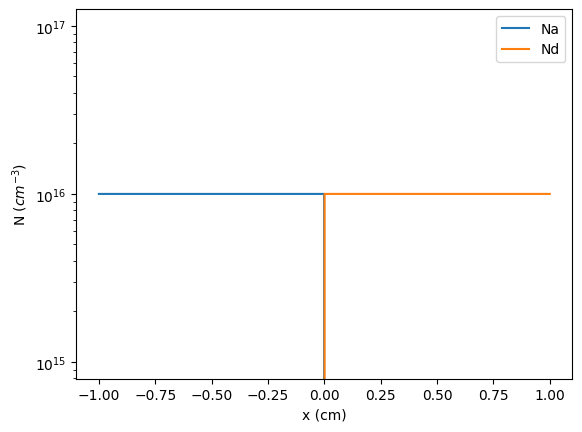

In [349]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [350]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=10000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 13%|█▎        | 1312/10000 [00:06<00:42, 204.83it/s]


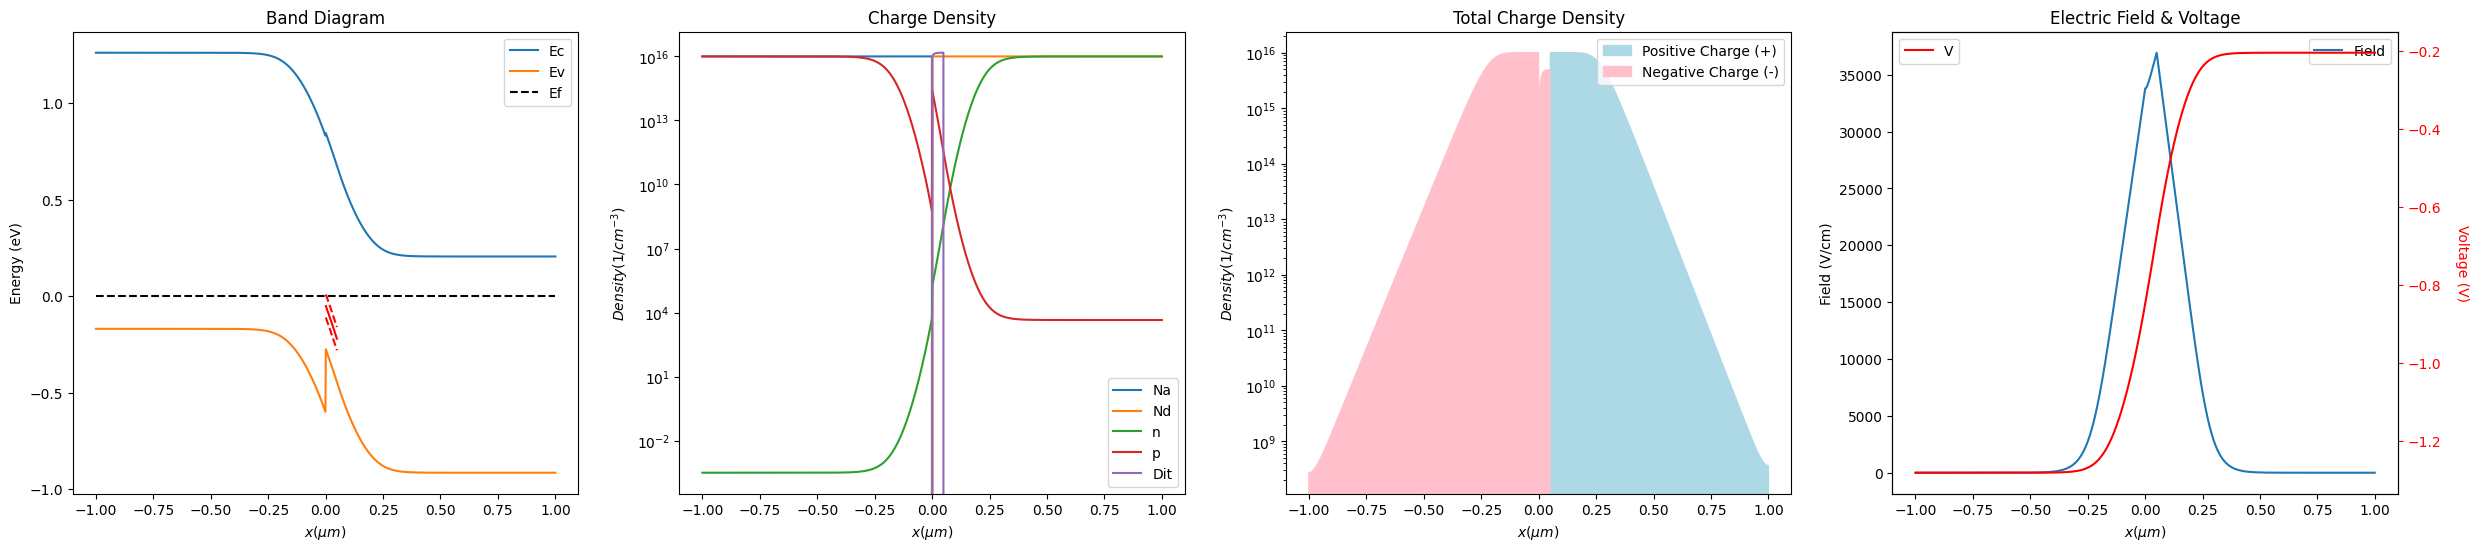

In [351]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si - GaAs Junction (Heterojunction) + Dit (Donor Like)

In [352]:
""" constants setting """
T = 300
kT_q = k*T/e
epsilon_Si     = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q   = epsilon_r['Si'] * epsilon_0 * 1e-2 / e
epsilon_GaAs   = epsilon_r['GaAs'] * epsilon_0 * 1e-2
epsilon_GaAs_q = epsilon_r['GaAs'] * epsilon_0 * 1e-2 / e


Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3
N_dit = 3e16 # cm^-2
E_dit_sigma = 0.02 # eV

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value

In [353]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = cal_Ec_from_V(x, V) 
    Ev[x >=0] -= Eg['Si']
    Ev[x < 0] -= Eg['GaAs']
    return Ev
def cal_n(x, V):
    n = np.zeros_like(x)
    mask = x >= 0
    n[mask]  = cal_electron_density(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    n[~mask] = cal_electron_density(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return n
def cal_p(x, V):
    p = np.zeros_like(x)
    mask = x >= 0
    p[mask]  = cal_hole_density(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    p[~mask] = cal_hole_density(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return p
def cal_dn_dV(x, V):
    dn_dV = np.zeros_like(x)
    mask = x >= 0
    dn_dV[mask]  = -cal_dn_dEc(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    dn_dV[~mask] = -cal_dn_dEc(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return dn_dV
def cal_dp_dV(x, V):
    dp_dV = np.zeros_like(x)
    mask = x >= 0
    dp_dV[mask]  = -cal_dp_dEv(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    dp_dV[~mask] = -cal_dp_dEv(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return dp_dV

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.2*Eg['Si']
    return E_dit_mean

def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = N_dit * (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = np.zeros_like(x)
    mask = x >= 0
    src[mask]  = - (1/epsilon_Si_q)   * (Nd[mask]  - Na[mask]  + cal_p(x[mask],  V[mask])  - cal_n(x[mask],  V[mask]))
    src[~mask] = - (1/epsilon_GaAs_q) * (Nd[~mask] - Na[~mask] + cal_p(x[~mask], V[~mask]) - cal_n(x[~mask], V[~mask]))

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_Si_q) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = np.zeros_like(x)
    mask = x >= 0
    d_src_dV[mask]  = - (1/epsilon_Si_q)   * (cal_dp_dV(x[mask],  V[mask])  - cal_dn_dV(x[mask],  V[mask]))
    d_src_dV[~mask] = - (1/epsilon_GaAs_q) * (cal_dp_dV(x[~mask], V[~mask]) - cal_dn_dV(x[~mask], V[~mask]))
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_Si_q) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV


In [354]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=10000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 12%|█▏        | 1202/10000 [00:05<00:36, 238.65it/s]


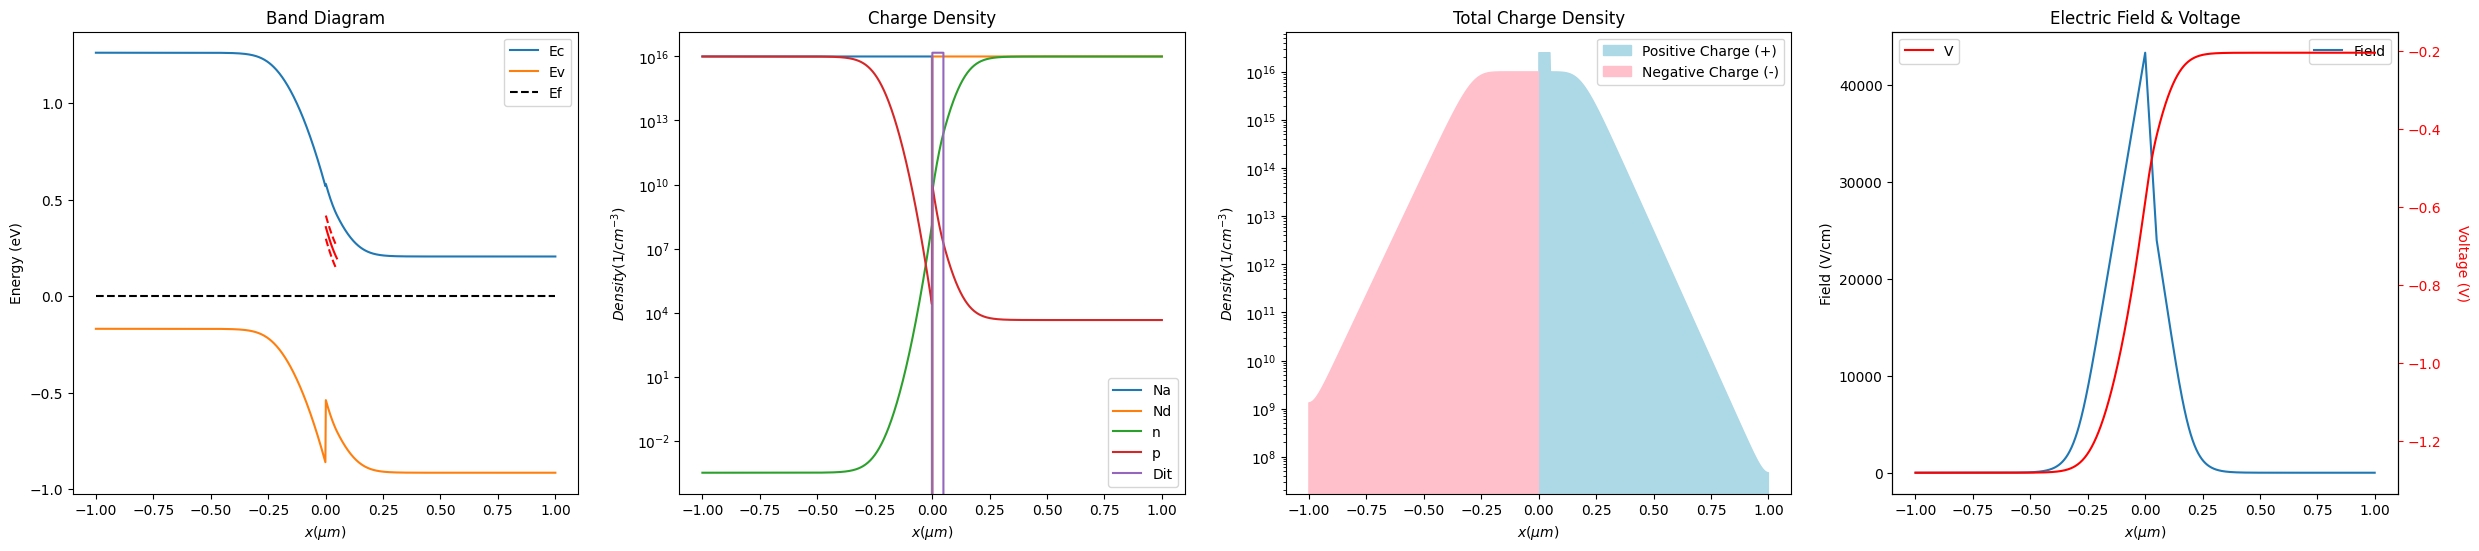

In [355]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si - GaAs Junction (Heterojunction) + Dit 

In [356]:
""" constants setting """
T = 300
kT_q = k*T/e
epsilon_Si     = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q   = epsilon_r['Si'] * epsilon_0 * 1e-2 / e
epsilon_GaAs   = epsilon_r['GaAs'] * epsilon_0 * 1e-2
epsilon_GaAs_q = epsilon_r['GaAs'] * epsilon_0 * 1e-2 / e


Na_value = 1e16 # cm^-3
Nd_value = 1e16 # cm^-3
N_dit = 4e16 # cm^-2
E_dit_sigma = 0.03 # eV

x = np.linspace(-1e-4, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

Na[x<0] = Na_value
Nd[x>0] = Nd_value

In [357]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    Ec[x < 0] += EA['Si'] - EA['GaAs']
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = cal_Ec_from_V(x, V) 
    Ev[x >=0] -= Eg['Si']
    Ev[x < 0] -= Eg['GaAs']
    return Ev
def cal_n(x, V):
    n = np.zeros_like(x)
    mask = x >= 0
    n[mask]  = cal_electron_density(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    n[~mask] = cal_electron_density(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return n
def cal_p(x, V):
    p = np.zeros_like(x)
    mask = x >= 0
    p[mask]  = cal_hole_density(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    p[~mask] = cal_hole_density(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return p
def cal_dn_dV(x, V):
    dn_dV = np.zeros_like(x)
    mask = x >= 0
    dn_dV[mask]  = -cal_dn_dEc(Ec = cal_Ec_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    dn_dV[~mask] = -cal_dn_dEc(Ec = cal_Ec_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['GaAs'])
    return dn_dV
def cal_dp_dV(x, V):
    dp_dV = np.zeros_like(x)
    mask = x >= 0
    dp_dV[mask]  = -cal_dp_dEv(Ev = cal_Ev_from_V(x[mask],  V[mask]),  Ef = 0.0, kT = kT_q, Nv =  Nv['Si'])
    dp_dV[~mask] = -cal_dp_dEv(Ev = cal_Ev_from_V(x[~mask], V[~mask]), Ef = 0.0, kT = kT_q, Nv =  Nv['GaAs'])
    return dp_dV

def cal_E_dit_mean(x, V):
    E_dit_mean = np.zeros_like(x)
    mask = np.bitwise_and( x>0, x<0.05e-4)

    Ec = cal_Ec_from_V(x[mask], V[mask])
    E_dit_mean[mask] = Ec - 0.5*Eg['Si']
    return E_dit_mean

def cal_Dit(x, V):
    Dit = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
    
    # shape = (1000, x size) / intergrate over E
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    DOS  = np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma 
    prob = f_FD * DOS
    
    
    # intergration
    Dit[mask] = N_dit * ( 0.5 - np.trapz(y = prob, x = E, axis=0) )
    return Dit
def cal_dDit_dV(x, V):
    dDit_dEc = np.zeros_like(x)
    # Dit between surfacee and 0.05 um
    mask = np.bitwise_and( x>0, x<0.05e-4)
    
    # Dit at ceter of bandgap
    E_dit_mean = cal_E_dit_mean(x[mask], V[mask])

    # shape = (1000, x size) / dEc = dE_dit_mean
    E    = np.linspace(E_dit_mean - 3*E_dit_sigma, E_dit_mean + 3*E_dit_sigma, 1000)
    f_FD = 1/(1+np.exp( (E - 0.0) / kT_q ) )
    dDOS_dEc = N_dit * (E - E_dit_mean) * np.exp( - (E - E_dit_mean)**2 / (2*E_dit_sigma**2) ) / np.sqrt(2*np.pi) / E_dit_sigma**3
    dprob_dEc = f_FD * dDOS_dEc

    # intergration
    dDit_dEc[mask] = - np.trapz(y = dprob_dEc, x = E, axis=0)
    return -dDit_dEc

def cal_total_charge_density(x, V):
    N = np.zeros_like(x)
    N  = Nd - Na  + cal_p(x,  V)  - cal_n(x,  V)

    mask = np.bitwise_and( x>0, x<0.05e-4)
    N[mask] += cal_Dit(x[mask], V[mask])
    return N

def src_fun(x, V):
    src = np.zeros_like(x)
    mask = x >= 0
    src[mask]  = - (1/epsilon_Si_q)   * (Nd[mask]  - Na[mask]  + cal_p(x[mask],  V[mask])  - cal_n(x[mask],  V[mask]))
    src[~mask] = - (1/epsilon_GaAs_q) * (Nd[~mask] - Na[~mask] + cal_p(x[~mask], V[~mask]) - cal_n(x[~mask], V[~mask]))

    mask = np.bitwise_and( x>0, x<0.05e-4)
    src[mask] -= (1/epsilon_Si_q) * cal_Dit(x[mask], V[mask])
    return src
def d_src_dV_fun(x, V):
    d_src_dV = np.zeros_like(x)
    mask = x >= 0
    d_src_dV[mask]  = - (1/epsilon_Si_q)   * (cal_dp_dV(x[mask],  V[mask])  - cal_dn_dV(x[mask],  V[mask]))
    d_src_dV[~mask] = - (1/epsilon_GaAs_q) * (cal_dp_dV(x[~mask], V[~mask]) - cal_dn_dV(x[~mask], V[~mask]))
    
    mask = np.bitwise_and( x>0, x<0.05e-4)
    d_src_dV[mask] -= (1/epsilon_Si_q) * cal_dDit_dV(x[mask], V[mask])
    return d_src_dV



In [358]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)
V = solver1D.solve_Poisson_1D(x = x, max_iter=10000, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater)

 12%|█▏        | 1197/10000 [00:05<00:40, 219.49it/s]


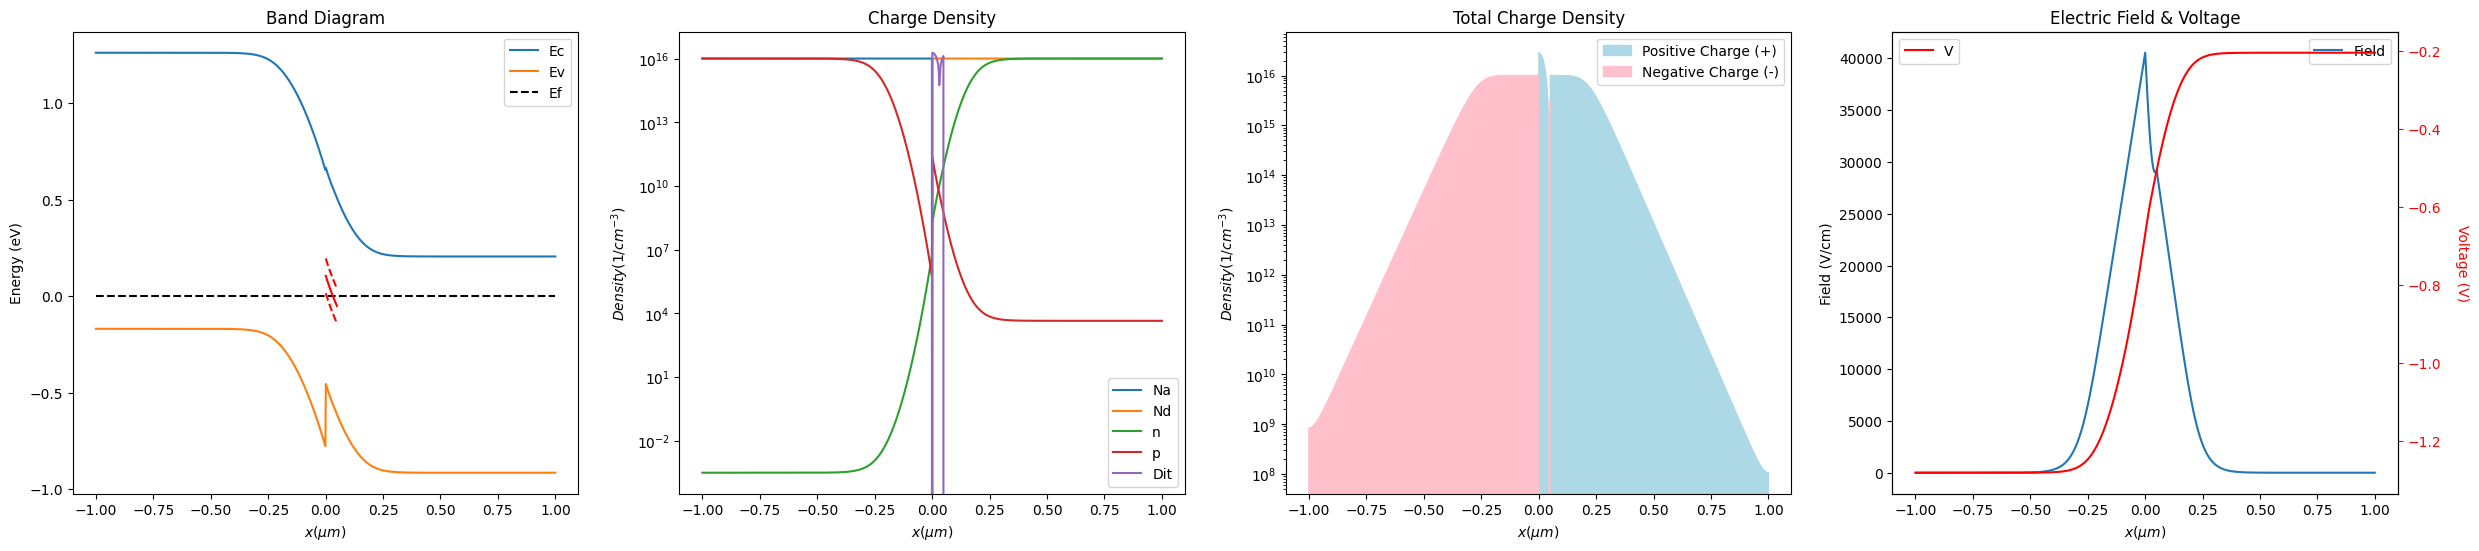

In [359]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

ax = solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);
ax[1].plot(x * 1e4, np.abs(cal_Dit(x, V)), label='Dit')
ax[1].legend()

mask = np.bitwise_and( x>0, x<0.05e-4)
E_dit_mean = cal_E_dit_mean(x[mask], V[mask])
ax[0].plot( x[mask]*1e4, E_dit_mean, 'r')
ax[0].plot( x[mask]*1e4, E_dit_mean+3*E_dit_sigma, 'r--')
ax[0].plot( x[mask]*1e4, E_dit_mean-3*E_dit_sigma, 'r--')

# Si N + BC + Dipole? 

In [360]:
""" constants setting """
T = 300 # (K)
kT_q = k*T/e 
epsilon_Si = epsilon_r['Si'] * epsilon_0 * 1e-2
epsilon_Si_q = epsilon_r['Si'] * epsilon_0 * 1e-2 / e

Na_value = 0 # cm^-3
Nd_value = 1e16 # cm^-3

x = np.linspace(0, 1e-4, 1000) # cm

Na = np.zeros_like(x)
Nd = np.zeros_like(x)

# doping region
L = 0.05e-4
Nd[x>=L] = Nd_value

# dipole
mask1 = np.bitwise_and(x>=0, x<L/3)
mask2 = np.bitwise_and(x>=(1-1/3)*L, x<L)

N_dipole = 3e17
Na[mask2] = N_dipole
Nd[mask1] = N_dipole

In [361]:
""" condition/material """
def cal_Ec_from_V(x, V, q = 1.0):
    Ec = -q*V
    return Ec
def cal_Ev_from_V(x, V, q = 1.0):
    Ev = -q*V - Eg['Si']
    return Ev
def cal_n(x, V):
    n = np.zeros_like(x)
    mask = x>=L 
    n[mask] = cal_electron_density(Ec = cal_Ec_from_V(x[mask], V[mask]), Ef = 0.0, kT = kT_q, Nc =  Nc['Si'])
    return n 
def cal_p(x, V):
    p = np.zeros_like(x)
    mask = x>=L 
    p[mask] = cal_hole_density(Ev = cal_Ev_from_V(x[mask], V[mask]), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
    return p
def cal_dn_dV(x, V):
    dn_dV = np.zeros_like(x)
    mask = x>=L 
    dn_dV[mask] = -cal_dn_dEc(Ec = cal_Ec_from_V(x[mask], V[mask]), Ef = 0.0, kT = kT_q, Nc = Nc['Si'])
    return dn_dV
def cal_dp_dV(x, V):
    dp_dV = np.zeros_like(x)
    mask = x>=L
    dp_dV[mask] = -cal_dp_dEv(Ev = cal_Ev_from_V(x[mask], V[mask]), Ef = 0.0, kT = kT_q, Nv = Nv['Si'])
    return dp_dV

def cal_total_charge_density(x, V):
    return Nd - Na + cal_p(x, V) - cal_n(x, V)
def cal_dtotal_charge_density_dV(x, V):
    return cal_dp_dV(x, V) - cal_dn_dV(x, V)
def src_fun(x, V):
    return - (1/epsilon_Si_q) * cal_total_charge_density(x, V)
def d_src_dV_fun(x, V):
    return - (1/epsilon_Si_q) * cal_dtotal_charge_density_dV(x, V)


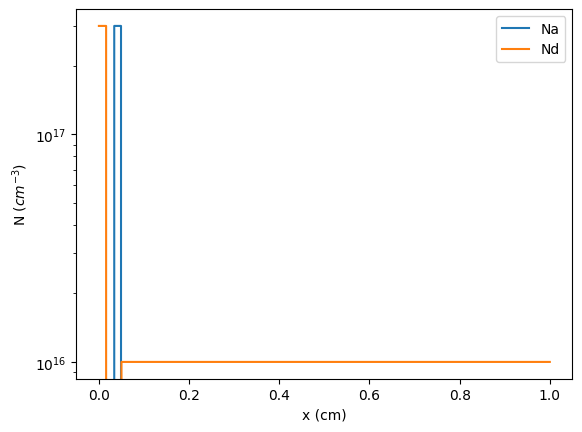

In [362]:
""" plot doping """
plt.plot(x * 1e4, Na, label='Na')
plt.plot(x * 1e4, Nd, label='Nd')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('N ($cm^{-3}$)')
plt.yscale('log')

In [363]:
""" solve Poisson equation """
V_updater = solver1D.Adagrad(size = x.size, lr=0.1)

WF = 4.5
phi_B = WF - EA['Si']
V = solver1D.solve_Poisson_1D(x = x, v0= -phi_B, vn=None, src_fun = src_fun, dsrc_dV_fun = d_src_dV_fun, V_updater = V_updater, max_iter=2000, tol=1e-10)

 21%|██        | 420/2000 [00:01<00:03, 418.82it/s]


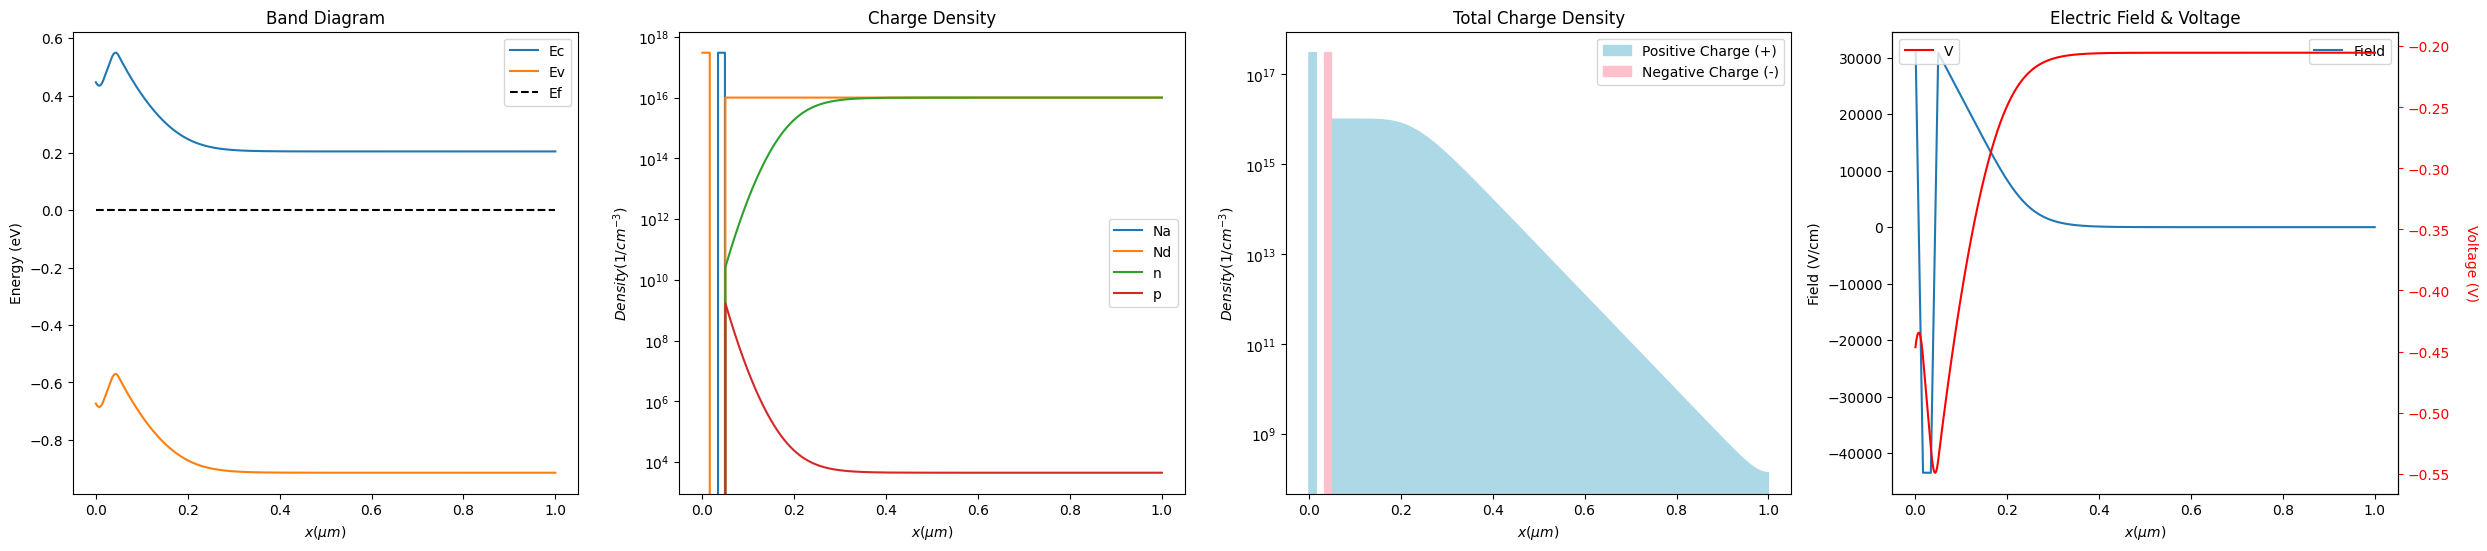

In [364]:
""" plot results """
n = cal_n(x, V)
p = cal_p(x, V)
Ec = cal_Ec_from_V(x, V)
Ev = cal_Ev_from_V(x, V)
total_charge_density = cal_total_charge_density(x, V)
Field = solver1D.do_gradient(V, dx = x[1] - x[0])

solver1D.plot_Poisson_1D(x=x, V=V, n=n, p=p, total_charge_density=total_charge_density, Ec=Ec, Ev=Ev, Field=Field, Na=Na, Nd=Nd);